##Regresión Logística

##Deibys Alejandro Cabeza Mendoza

##ANÁLISIS DE DATOS - (202016908A_1704)

In [5]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [7]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("heart_cleveland_upload.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [9]:
data.shape

(297, 14)

In [11]:

data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [13]:
data.isna().sum()


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

(array([ 96.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 201.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

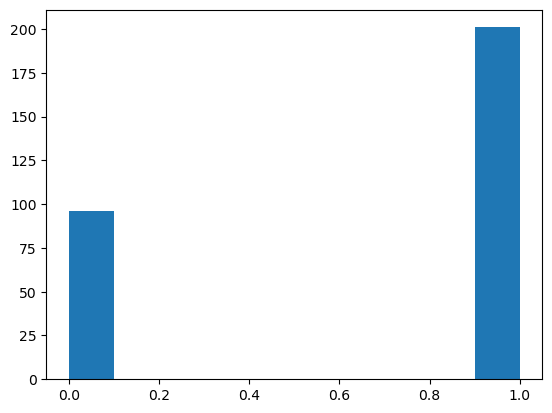

In [15]:
plt.hist(data.sex)

<Axes: xlabel='age', ylabel='sex'>

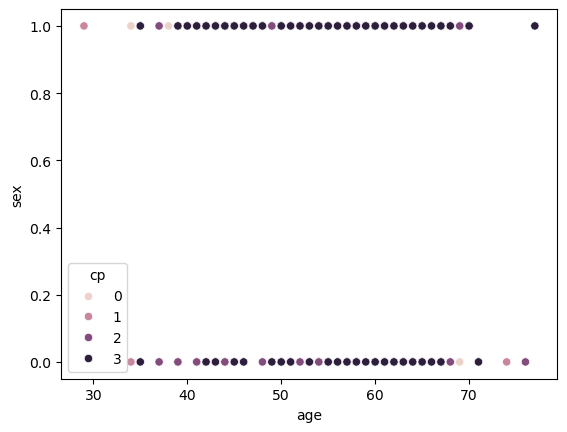

In [17]:
sns.scatterplot(x = "age", y = "sex", hue = "cp", data = data)

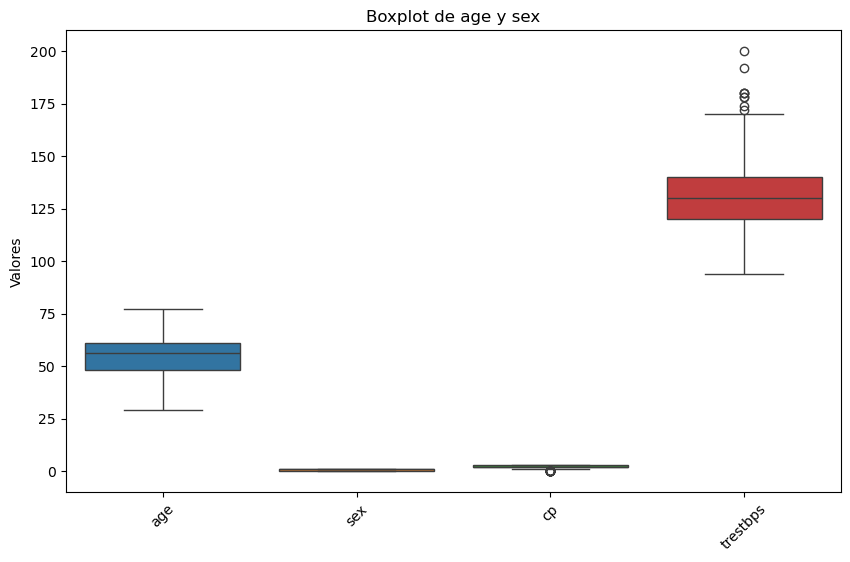

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['age', 'sex', 'cp', 'trestbps']])
plt.xticks(rotation=45)
plt.title('Boxplot de age y sex')
plt.ylabel('Valores')
plt.show()

In [27]:
predictors_col = ["age", "sex", "cp", "trestbps"]
target_col = ['cp']

In [29]:
predictors = data[predictors_col]
target = data[target_col]

In [31]:
predictors

,age,sex,cp,trestbps
0,69,1,0,160
1,69,0,0,140
2,66,0,0,150
3,65,1,0,138
4,64,1,0,110
...,...,...,...,...
292,40,1,3,152
293,39,1,3,118
294,35,1,3,120
295,35,0,3,138


In [33]:
target


,cp
0,0
1,0
2,0
3,0
4,0
...,...
292,3
293,3
294,3
295,3


In [35]:
corr = predictors.corr()
corr

,age,sex,cp,trestbps
age,1.000000,-0.092399,0.110471,0.290476
sex,-0.092399,1.000000,0.008908,-0.066340
cp,0.110471,0.008908,1.000000,-0.036980
trestbps,0.290476,-0.066340,-0.036980,1.000000


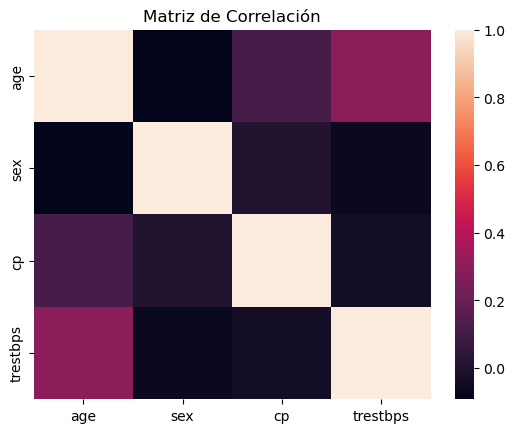

In [37]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)


In [41]:

tree = DecisionTreeClassifier()

In [43]:
arbol = tree.fit(X_train, y_train)

[Text(0.6666666666666666, 0.875, 'x[2] <= 2.5\ngini = 0.667\nsamples = 237\nvalue = [19, 38, 71, 109]'),
 Text(0.5, 0.625, 'x[2] <= 1.5\ngini = 0.582\nsamples = 128\nvalue = [19, 38, 71, 0]'),
 Text(0.5833333333333333, 0.75, 'True  '),
 Text(0.3333333333333333, 0.375, 'x[2] <= 0.5\ngini = 0.444\nsamples = 57\nvalue = [19, 38, 0, 0]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 19\nvalue = [19, 0, 0, 0]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 71\nvalue = [0, 0, 71, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 109\nvalue = [0, 0, 0, 109]'),
 Text(0.75, 0.75, '  False')]

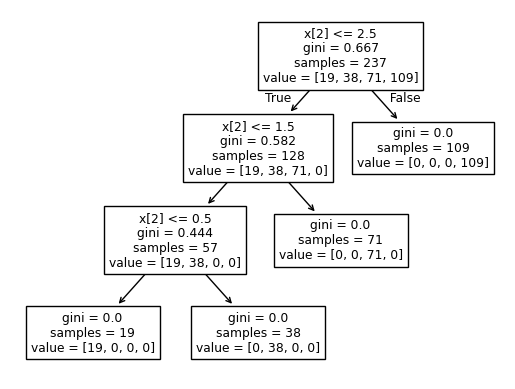

In [45]:
plot_tree(arbol)

In [47]:
predicciones = arbol.predict(X_test)

In [49]:
predicciones

array([3, 2, 3, 2, 1, 2, 1, 1, 1, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 2, 3,
       3, 0, 3, 2, 3, 1, 3, 2, 1, 3, 3, 3, 2, 0, 3, 3, 3, 3, 3, 3, 2, 3,
       3, 1, 3, 2, 3, 3, 1, 3, 2, 3, 3, 1, 2, 1, 2, 1], dtype=int64)

In [51]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,0,1,2,3
Actual,,,,
0,4,0,0,0
1,0,11,0,0
2,0,0,12,0
3,0,0,0,33


In [53]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

1.0

In [55]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

1.0

In [57]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

1.0

In [59]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

1.0